In [1]:
import srt_util
import PhysicsTool as pt
pt.plotting.set_theme()
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [2]:
with srt_util.SRT_HDF_Reader('Measurements/MilkyWay1dScan/MilkyWayScan_T2200_G350to190_Stp0deg25_20251002.hdf') as srt_reader:
    mw_pos = srt_reader.get_object_positions()
    mw_spec = srt_reader.get_power_spectrum()


In [12]:
def plot_mw_scan_polar_diagram(mw_pos):
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='polar')
    ax.set_theta_direction(-1)
    ax.set_theta_offset(3.0*m.pi/2.0)
    ax.set_rmin(90.0)
    ax.set_rmax(0.0)

    ax.set_rlabel_position(0)  
    ax.text(0.55, 0.38, "Elevation [°]", transform=ax.transAxes)
    ax.plot(mw_pos['Azimuth']/180.0*m.pi, mw_pos['Elevation'], color="red", linewidth=1.0)

    ax.text(0.25, 1.03, "Azimuth", transform=ax.transAxes)
    ax.text(0.55, 1.03, "(S)", transform=ax.transAxes)
    ax.text(1.09, 0.49, "(W)", transform=ax.transAxes)
    ax.text(-0.13, 0.49, "(E)", transform=ax.transAxes)

    mw_pos_interest_idx = [0, 320, len(mw_pos['CenterH'])-1]
    az_interest = np.array([mw_pos['Azimuth'][i] for i in mw_pos_interest_idx])
    elv_interest = np.array([mw_pos['Elevation'][i] for i in mw_pos_interest_idx])
    g_long_interest  = np.array([360.0-mw_pos['CenterH'][i] for i in mw_pos_interest_idx])

    ax.scatter(az_interest/180.0*m.pi, elv_interest, color="red")
    ax.text(0.5, 0.8, f"Start: t=22:00 MESZ\nGal. long. l={g_long_interest[0]}°", transform=ax.transAxes, color="red", fontsize=10)
    ax.text(0.26, 0.54, f"Gal. long. l={g_long_interest[1]}°", transform=ax.transAxes, color="red", fontsize=10)
    ax.text(0.2, 0.17, f"End: t=22:28 MESZ\nGal. long. l={g_long_interest[2]}°", transform=ax.transAxes, color="red", fontsize=10)


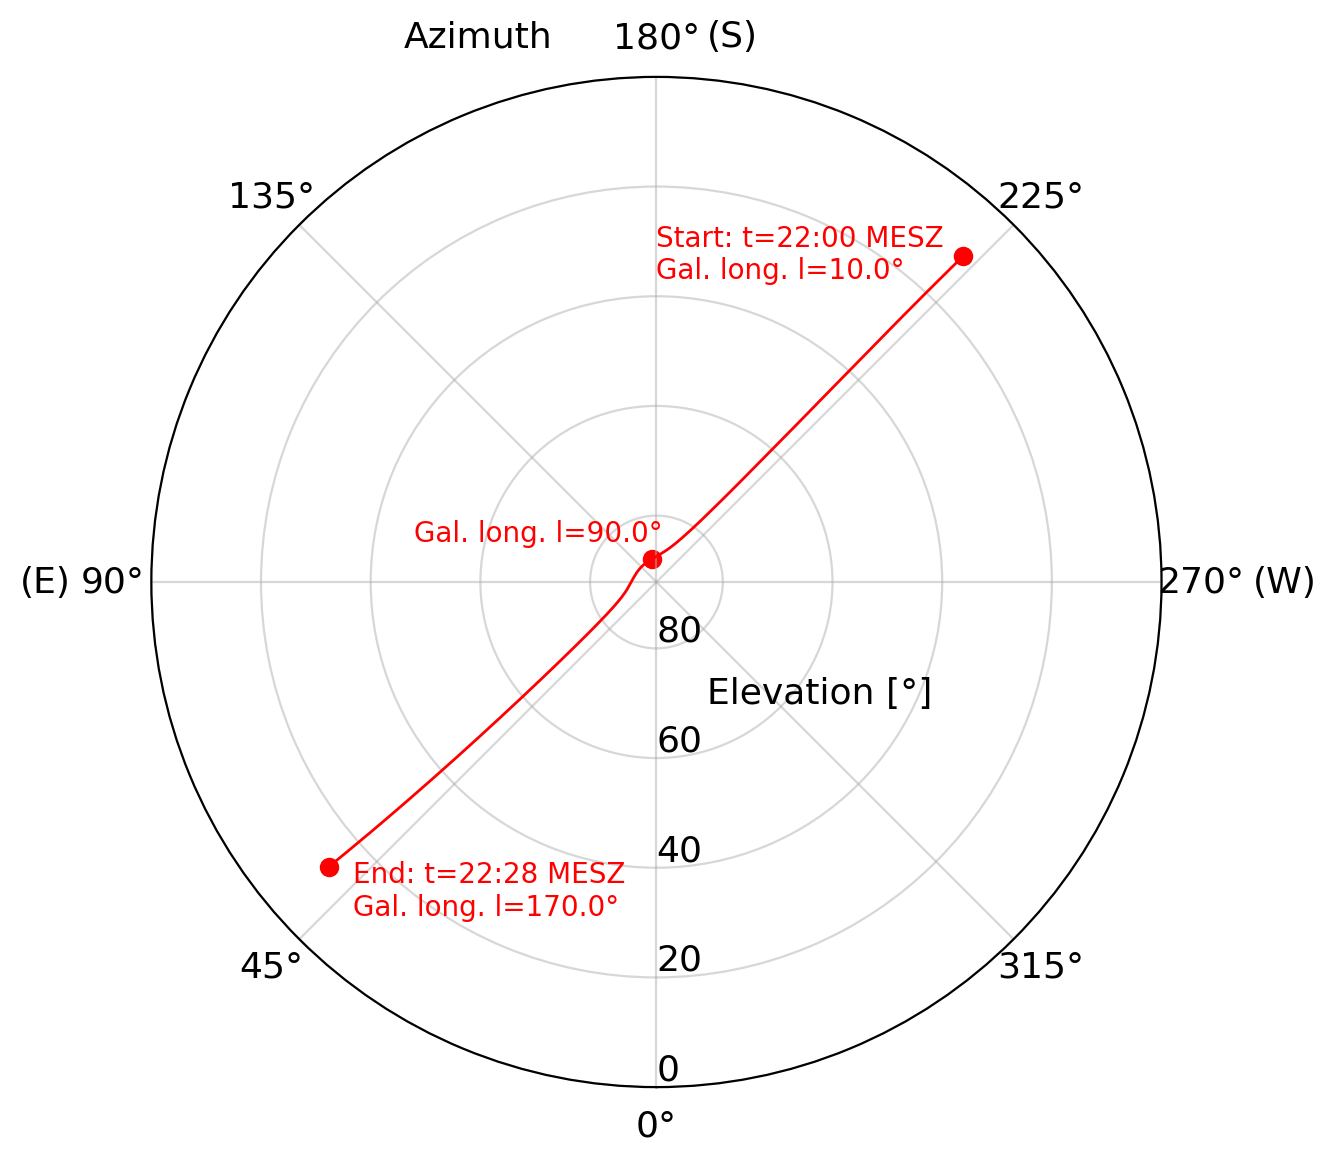

In [13]:
plot_mw_scan_polar_diagram(mw_pos)
plt.show()

In [5]:
def plot_mw_scan_spectra(spec, x_vals, label, scale = 1):
    minmax_x = (min(x_vals), max(x_vals))

    minmax_freq = (srt_util.MINMAX_FREQ[0] / scale , srt_util.MINMAX_FREQ[1] / scale)

    im = plt.imshow(spec.T, extent=(*minmax_x, *minmax_freq), origin='lower', aspect='auto')
    

    cbar = plt.colorbar(im)
    cbar.set_label(label)

    plt.ylim(minmax_freq)
    plt.yticks(srt_util.SPECTROMETER_TICKS/scale)

v_r= [ 84.  38.  53. -27. -46. -61. -68. -53.]
R/R0 [0.57 0.79 0.76 1.14 1.27 1.43 1.77 1.92]

ROI Spots
[ 30  40  50  85  98 112 135 150]
[ 45.  63.  61.  91. 102. 114. 141. 154.]


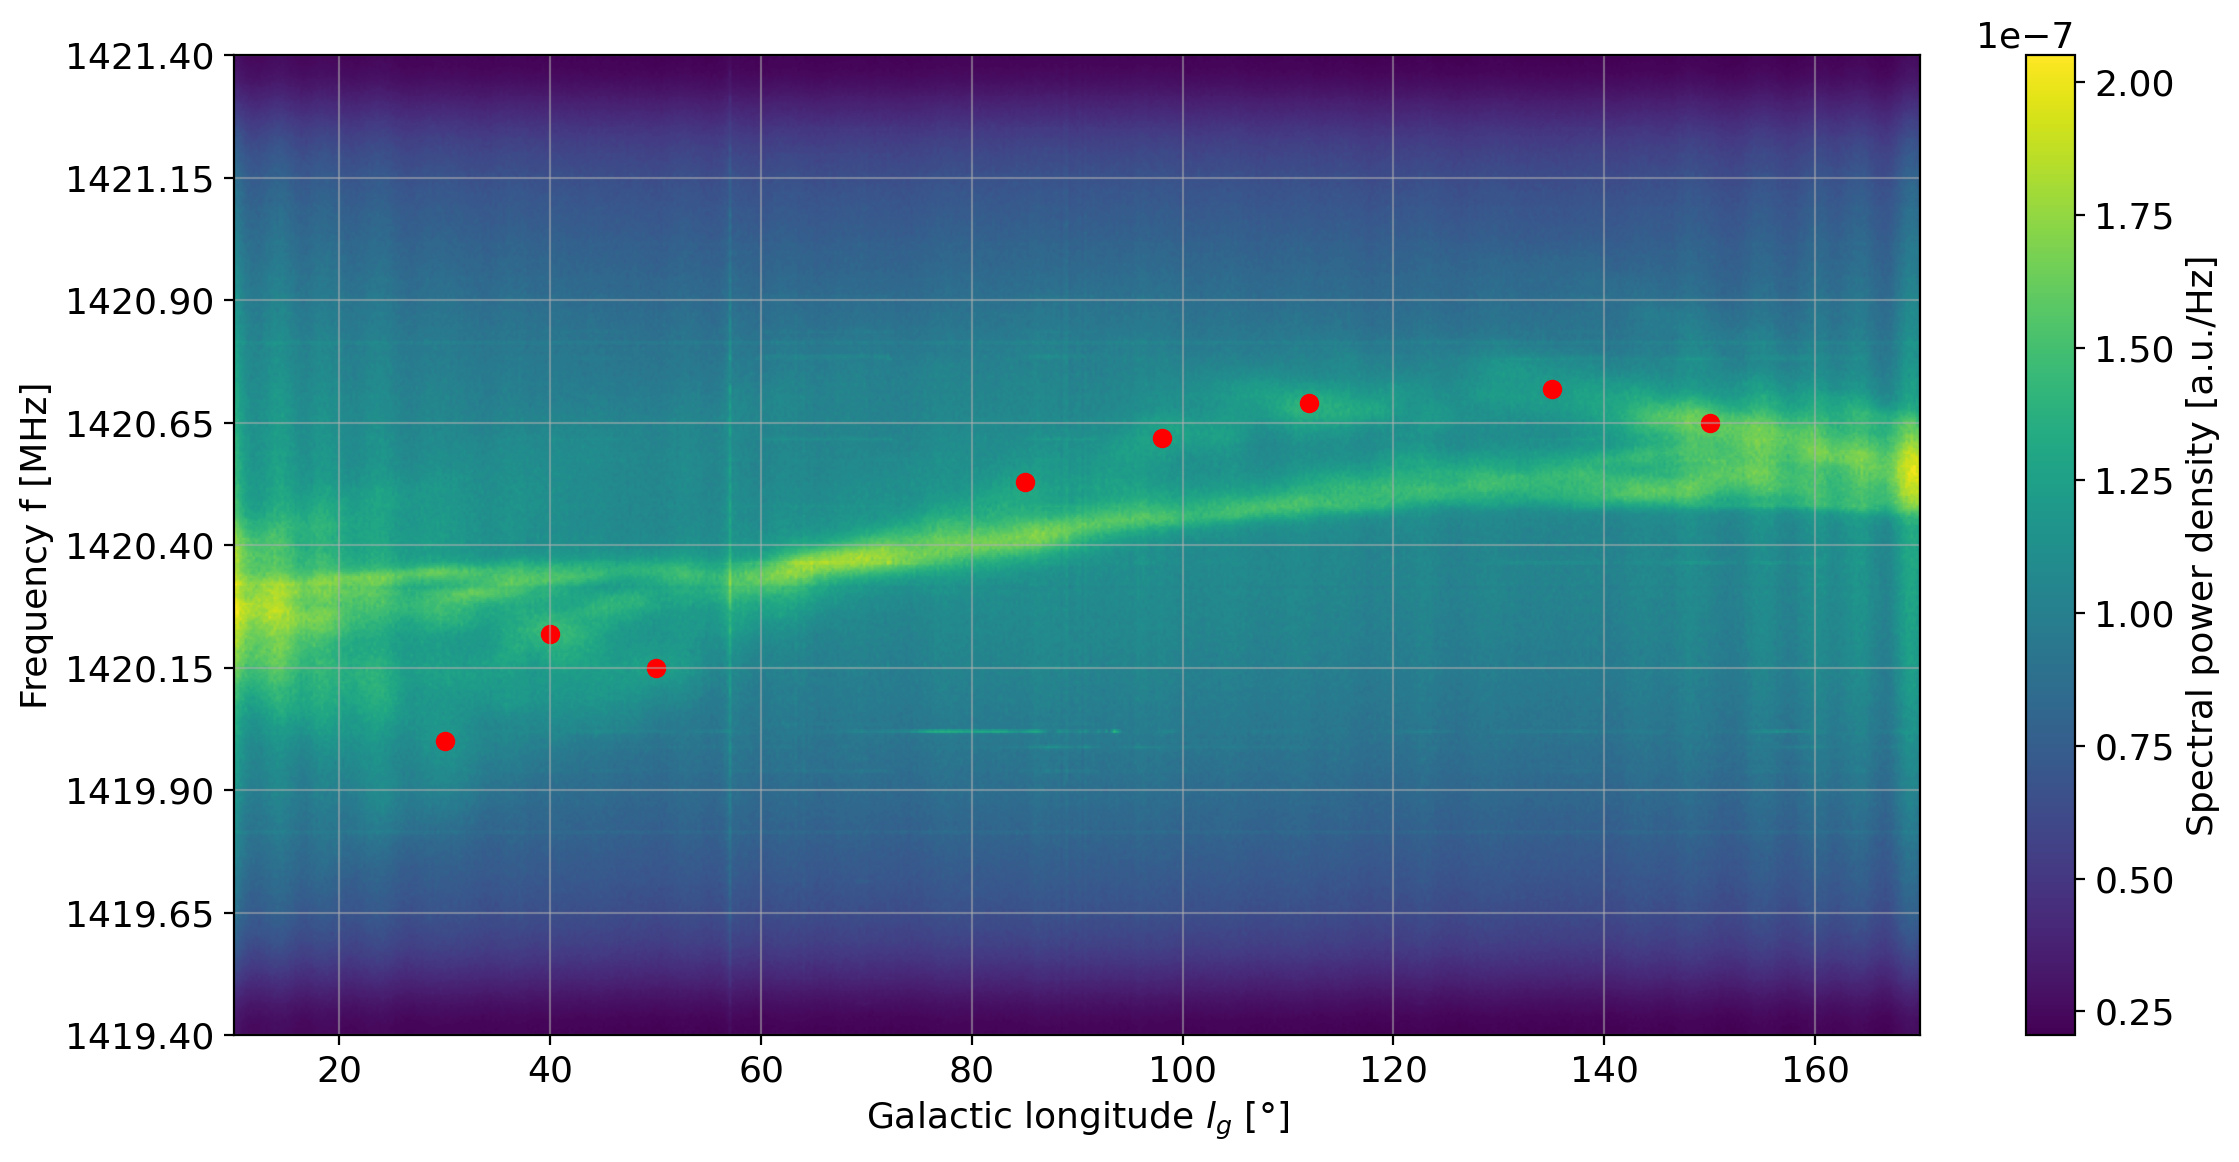

In [6]:
c_kmps = 300000.0
v_0_kmps = 220.0
f_c_MHz = 1420.4

# main_arm_l = np.array([   30,    45,    60,    75,    90,   105,   120,   135,   150])
# main_arm_f = np.array([20.34, 20.34, 20.34, 20.38, 20.44, 20.47, 20.52, 20.52, 20.52]) + 1400
# main_arm_vr_kmps = (f_c_MHz-main_arm_f) / f_c_MHz * c_kmps
# main_arm_R_over_R0 = 1 / (main_arm_vr_kmps / (v_0_kmps * np.sin(main_arm_l/180*m.pi)) + 1.0)

roi_spots_l = np.array([   30,    40,    50,    85,    98,   112,   135,   150])
roi_spots_f = np.array([20.00, 20.22, 20.15, 20.53, 20.62, 20.69, 20.72, 20.65]) + 1400
roi_spots_vr_kmps = (f_c_MHz-roi_spots_f) / f_c_MHz * c_kmps
roi_spots_R_over_R0 = 1 / (roi_spots_vr_kmps / (v_0_kmps * np.sin(roi_spots_l/180*m.pi)) + 1.0)
print("v_r=",np.round(roi_spots_vr_kmps,0));
print("R/R0",np.round(roi_spots_R_over_R0,2));

R0_imageunits = 80.0
# main_arm_R_imageunits = main_arm_R_over_R0 * R0_imageunits
roi_spots_R_imageunits = roi_spots_R_over_R0 * R0_imageunits

# print("Main arm")
# print(main_arm_l)
# print(np.round(main_arm_R_imageunits,0))

print("\nROI Spots")
print(roi_spots_l)
print(np.round(roi_spots_R_imageunits,0))


pt.plotting.set_up_plot(None, f'Galactic longitude $l_g$ [°]', 'Frequency f [MHz]')
plot_mw_scan_spectra(mw_spec, 360.0-mw_pos['CenterH'],'Spectral power density [a.u./Hz]', 1e6) # Galactic longitudes are wrong in LabView tool. 270° should be 90°. Therfore correct is l = 360°-l_labview

# plt.scatter(main_arm_l, main_arm_f, color="red")
plt.scatter(roi_spots_l, roi_spots_f, color="red")
plt.show()



In [7]:
# Milky Way 2D scan

bw_spectrum = 2e6 # band width of full spectrum = 2MHz

with srt_util.SRT_HDF_Reader('Measurements/MilkyWay2dScan/MilkyWayScan_2D_T2225_20251007.hdf') as srt_reader:
    mw2d1_pos = srt_reader.get_object_positions()
    mw2d1_pwr = srt_reader.get_power_spectrum().sum(axis=1) * bw_spectrum # multiply with spectrum band with to get power in a.u.
    mw2d1_time = srt_reader.get_time()

with srt_util.SRT_HDF_Reader('Measurements/MilkyWay2dScan/MilkyWayScan_2D_T0300_20251009.hdf') as srt_reader:
    mw2d2_pos = srt_reader.get_object_positions()
    mw2d2_pwr = srt_reader.get_power_spectrum().sum(axis=1) * bw_spectrum # multiply with spectrum band with to get power in a.u.
    mw2d2_time = srt_reader.get_time()

# Concatenate the two measurements
MW2D1_POS_IDX_START = 25
MW2D1_POS_IDX_END = -125
mw2d_g_long = np.concatenate((360.0-mw2d1_pos['CenterH'][MW2D1_POS_IDX_START:MW2D1_POS_IDX_END], 360.0-mw2d2_pos['CenterH']))
mw2d_g_lat = np.concatenate((0.0-mw2d1_pos['CenterV'][MW2D1_POS_IDX_START:MW2D1_POS_IDX_END], 0.0-mw2d2_pos['CenterV']))
mw2d_Az = np.concatenate((mw2d1_pos['TrueAzimuth'][MW2D1_POS_IDX_START:MW2D1_POS_IDX_END], mw2d2_pos['TrueAzimuth']))
mw2d_Elv = np.concatenate((mw2d1_pos['TrueElevation'][MW2D1_POS_IDX_START:MW2D1_POS_IDX_END], mw2d2_pos['TrueElevation']))
mw2d_pwr = np.concatenate((mw2d1_pwr[MW2D1_POS_IDX_START:MW2D1_POS_IDX_END], mw2d2_pwr))
mw2d_time = np.concatenate((mw2d1_time[MW2D1_POS_IDX_START:MW2D1_POS_IDX_END], mw2d2_time))

# Limit elevation to 90° (Error in LabView tool, these data will be ignored)
for i in range(len(mw2d_Elv)):
    if mw2d_Elv[i] > 90.0: mw2d_Elv[i] = 90.0

# Create power map
LAT_SCAN_WIDTH = 25
LONG_SCAN_WIDTH = len(mw2d_pwr)//LAT_SCAN_WIDTH

print(LONG_SCAN_WIDTH)

mw2d_pwr_map = np.empty((LONG_SCAN_WIDTH, LAT_SCAN_WIDTH))
mw2d_long_map = np.empty((LONG_SCAN_WIDTH, LAT_SCAN_WIDTH))
mw2d_lat_map = np.empty((LONG_SCAN_WIDTH, LAT_SCAN_WIDTH))

for i in range(LONG_SCAN_WIDTH):
    # mirror each second row (scan is meander shape)
    if (i & 1) != 0:
        mw2d_pwr_map[i] = np.flip(mw2d_pwr[i*LAT_SCAN_WIDTH:(i+1)*LAT_SCAN_WIDTH])
        mw2d_long_map[i] = np.flip(mw2d_g_long[i*LAT_SCAN_WIDTH:(i+1)*LAT_SCAN_WIDTH])
        mw2d_lat_map[i] = np.flip(mw2d_g_lat[i*LAT_SCAN_WIDTH:(i+1)*LAT_SCAN_WIDTH])
    else:
        mw2d_pwr_map[i] = mw2d_pwr[i*LAT_SCAN_WIDTH:(i+1)*LAT_SCAN_WIDTH]
        mw2d_long_map[i] = mw2d_g_long[i*LAT_SCAN_WIDTH:(i+1)*LAT_SCAN_WIDTH]
        mw2d_lat_map[i] = mw2d_g_lat[i*LAT_SCAN_WIDTH:(i+1)*LAT_SCAN_WIDTH]

REC1_CORRUPT_START_IDX = 925
REC2_START_IDX = 1475

88


In [22]:
def plot_mw2d_scan_polar_diagram(az, elv):
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='polar')
    ax.set_theta_direction(-1)
    ax.set_theta_offset(3.0*m.pi/2.0)
    ax.set_rmin(90.0)
    ax.set_rmax(0.0)

    ax.set_rlabel_position(0)  
    ax.text(0.6, 0.23, "Elevation [°]", transform=ax.transAxes)
    
    
    ax.plot(az[:REC1_CORRUPT_START_IDX]/180.0*m.pi, elv[:REC1_CORRUPT_START_IDX], color="green", linewidth=1.0, label="Scan 1: 07.10.25, 22:30...23:36")
    ax.plot(az[REC1_CORRUPT_START_IDX-1:REC2_START_IDX]/180.0*m.pi, elv[REC1_CORRUPT_START_IDX-1:REC2_START_IDX], color="red", linewidth=1.0, label="Scan 1: 07.10.25, 22:36...00:17 (corrupt)")
    ax.plot(az[REC2_START_IDX:]/180.0*m.pi, elv[REC2_START_IDX:], color="blue", linewidth=1.0, label="Scan 2: 09.10.25, 03:01...03:51")
    ax.legend(loc="lower left")

    ax.text(0.25, 1.03, "Azimuth", transform=ax.transAxes)
    ax.text(0.55, 1.03, "(S)", transform=ax.transAxes)
    ax.text(1.09, 0.49, "(W)", transform=ax.transAxes)
    ax.text(-0.13, 0.49, "(E)", transform=ax.transAxes)

2025-10-07T20:29:19
2025-10-07T21:36:36
2025-10-07T22:17:44
2025-10-09T01:01:38
2025-10-09T01:51:59


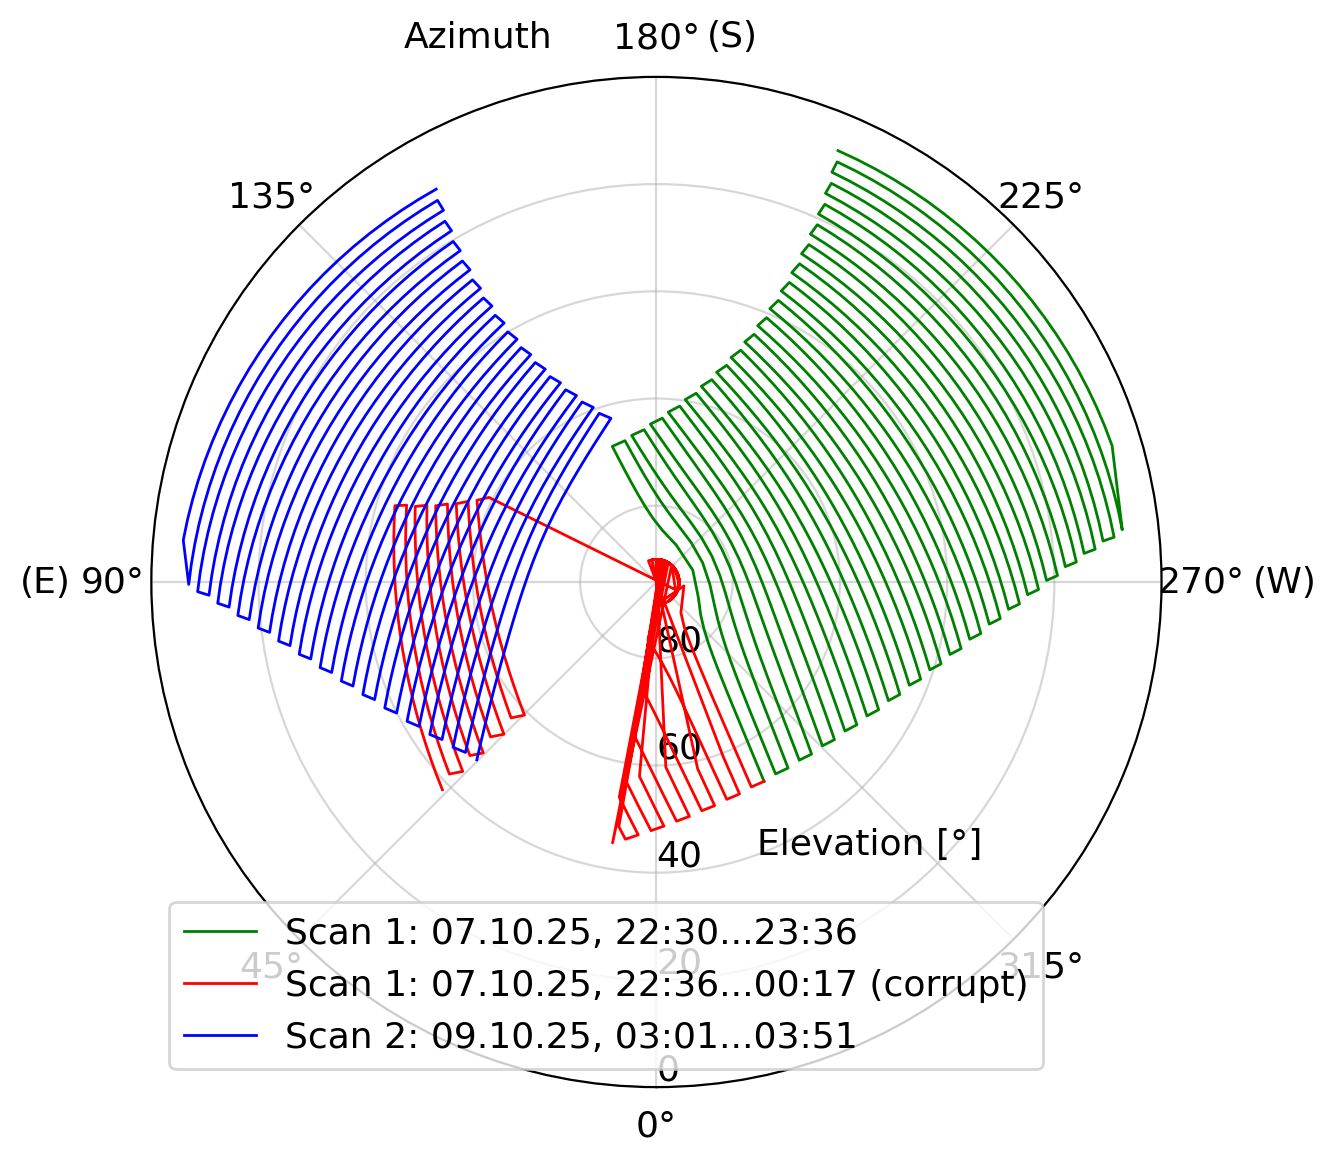

In [24]:
print(mw2d_time[0])
print(mw2d_time[REC1_CORRUPT_START_IDX])
print(mw2d_time[REC2_START_IDX-1])
print(mw2d_time[REC2_START_IDX])
print(mw2d_time[-1])

plot_mw2d_scan_polar_diagram(mw2d_Az, mw2d_Elv)
plt.show()

# Normalize plot by cutting bright main building at left
pwr_max = np.max(mw2d_pwr_map[5:])
for x in range(5):
    for y in range(len(mw2d_pwr_map[0])):
        if mw2d_pwr_map[x,y] > pwr_max: mw2d_pwr_map[x,y] = pwr_max



In [10]:
def plot_mw2d_pwr_map(pwr_map, x_vals, y_vals, label):
    minmax_x = (min(x_vals), max(x_vals))
    minmax_y = (min(y_vals), max(y_vals))    

    im = plt.imshow(pwr_map.T, extent=(*minmax_x, *minmax_y), origin='lower', aspect='auto')
    
    cbar = plt.colorbar(im)
    cbar.set_label(label)

    plt.ylim(minmax_y)

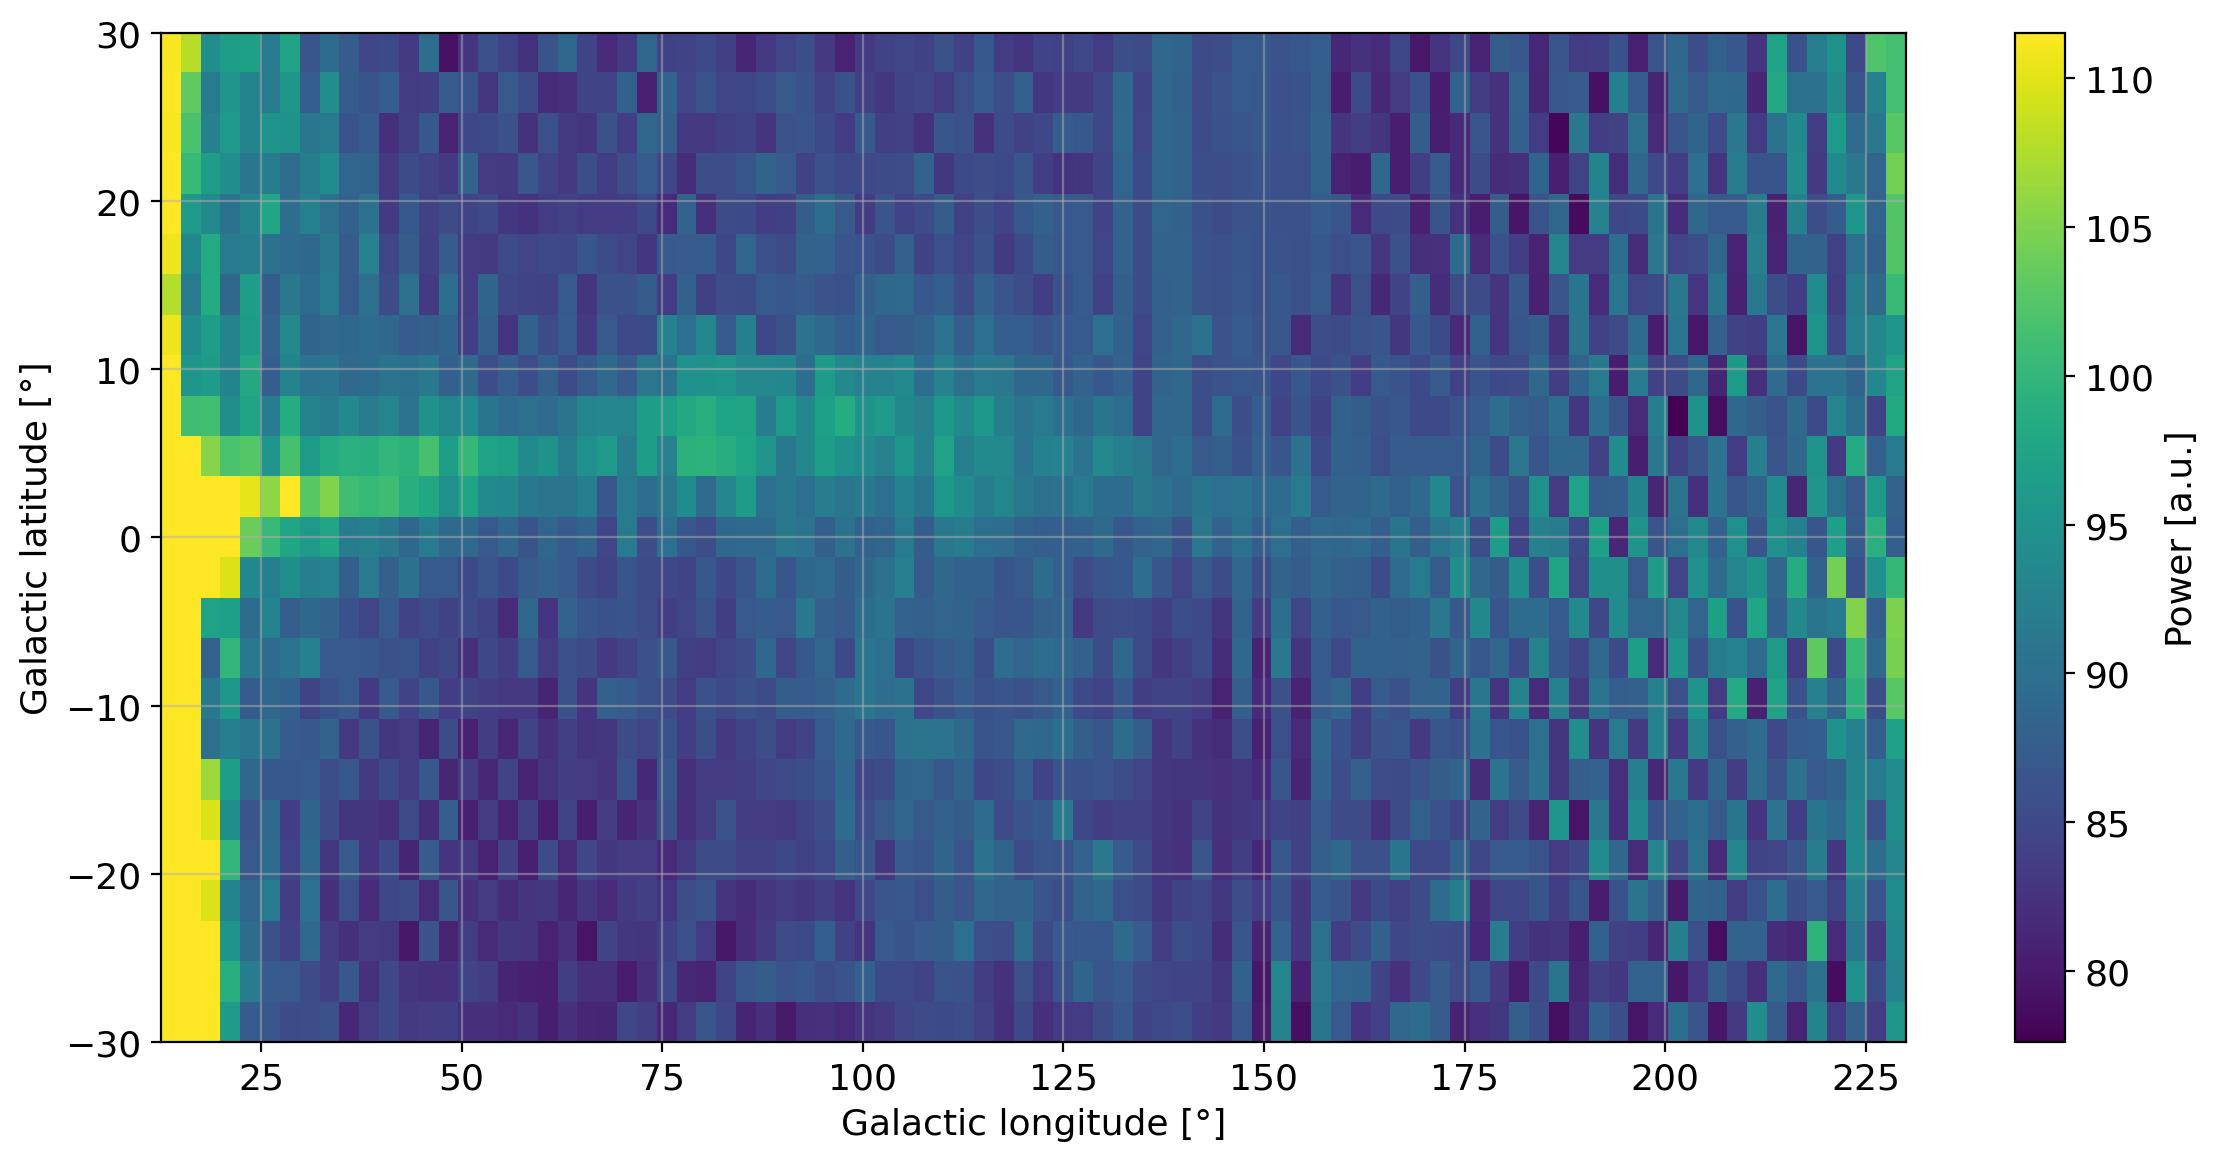

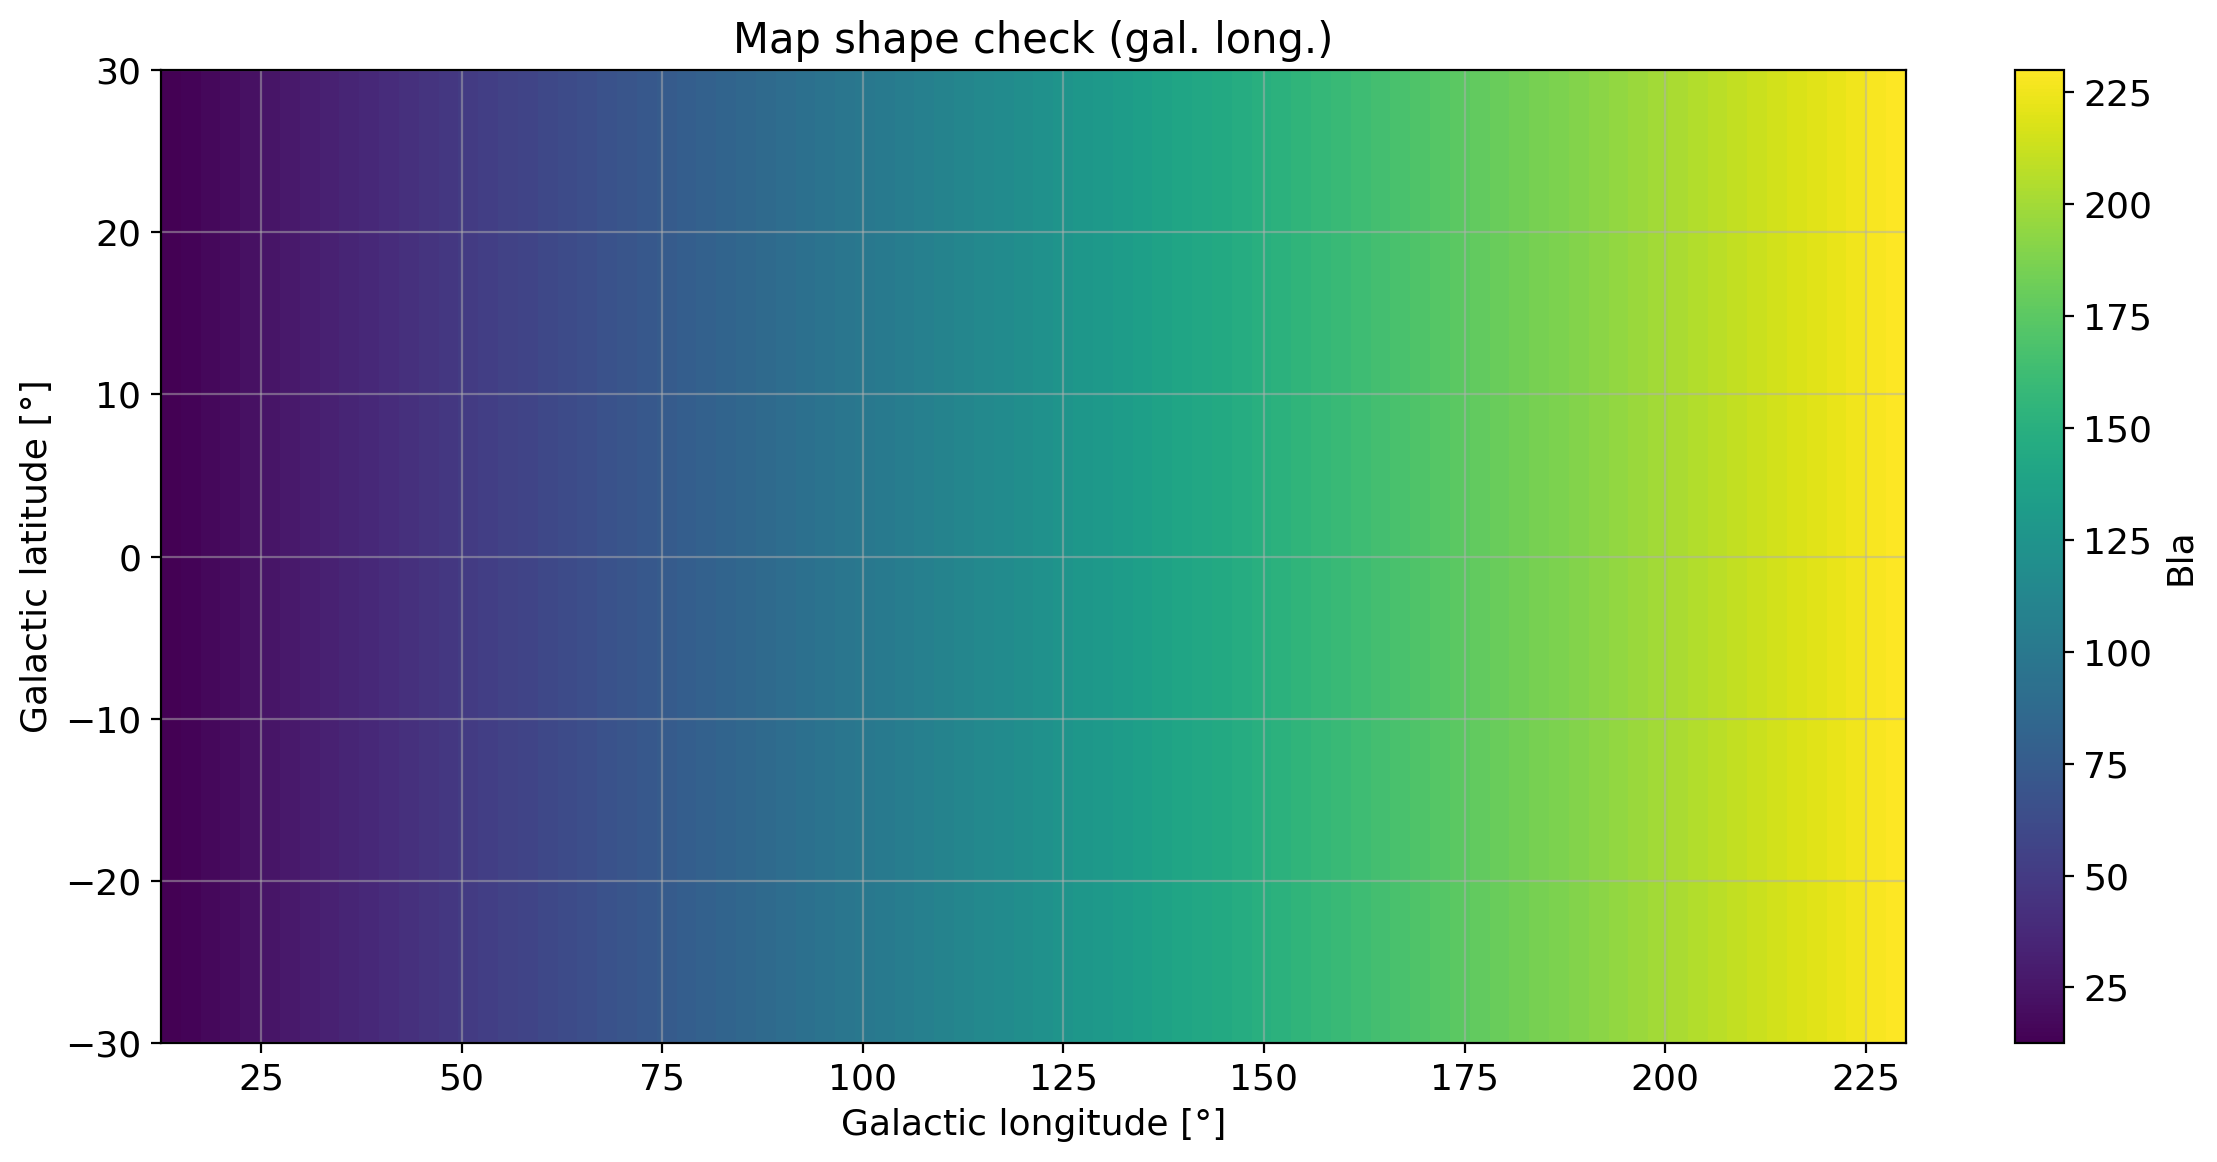

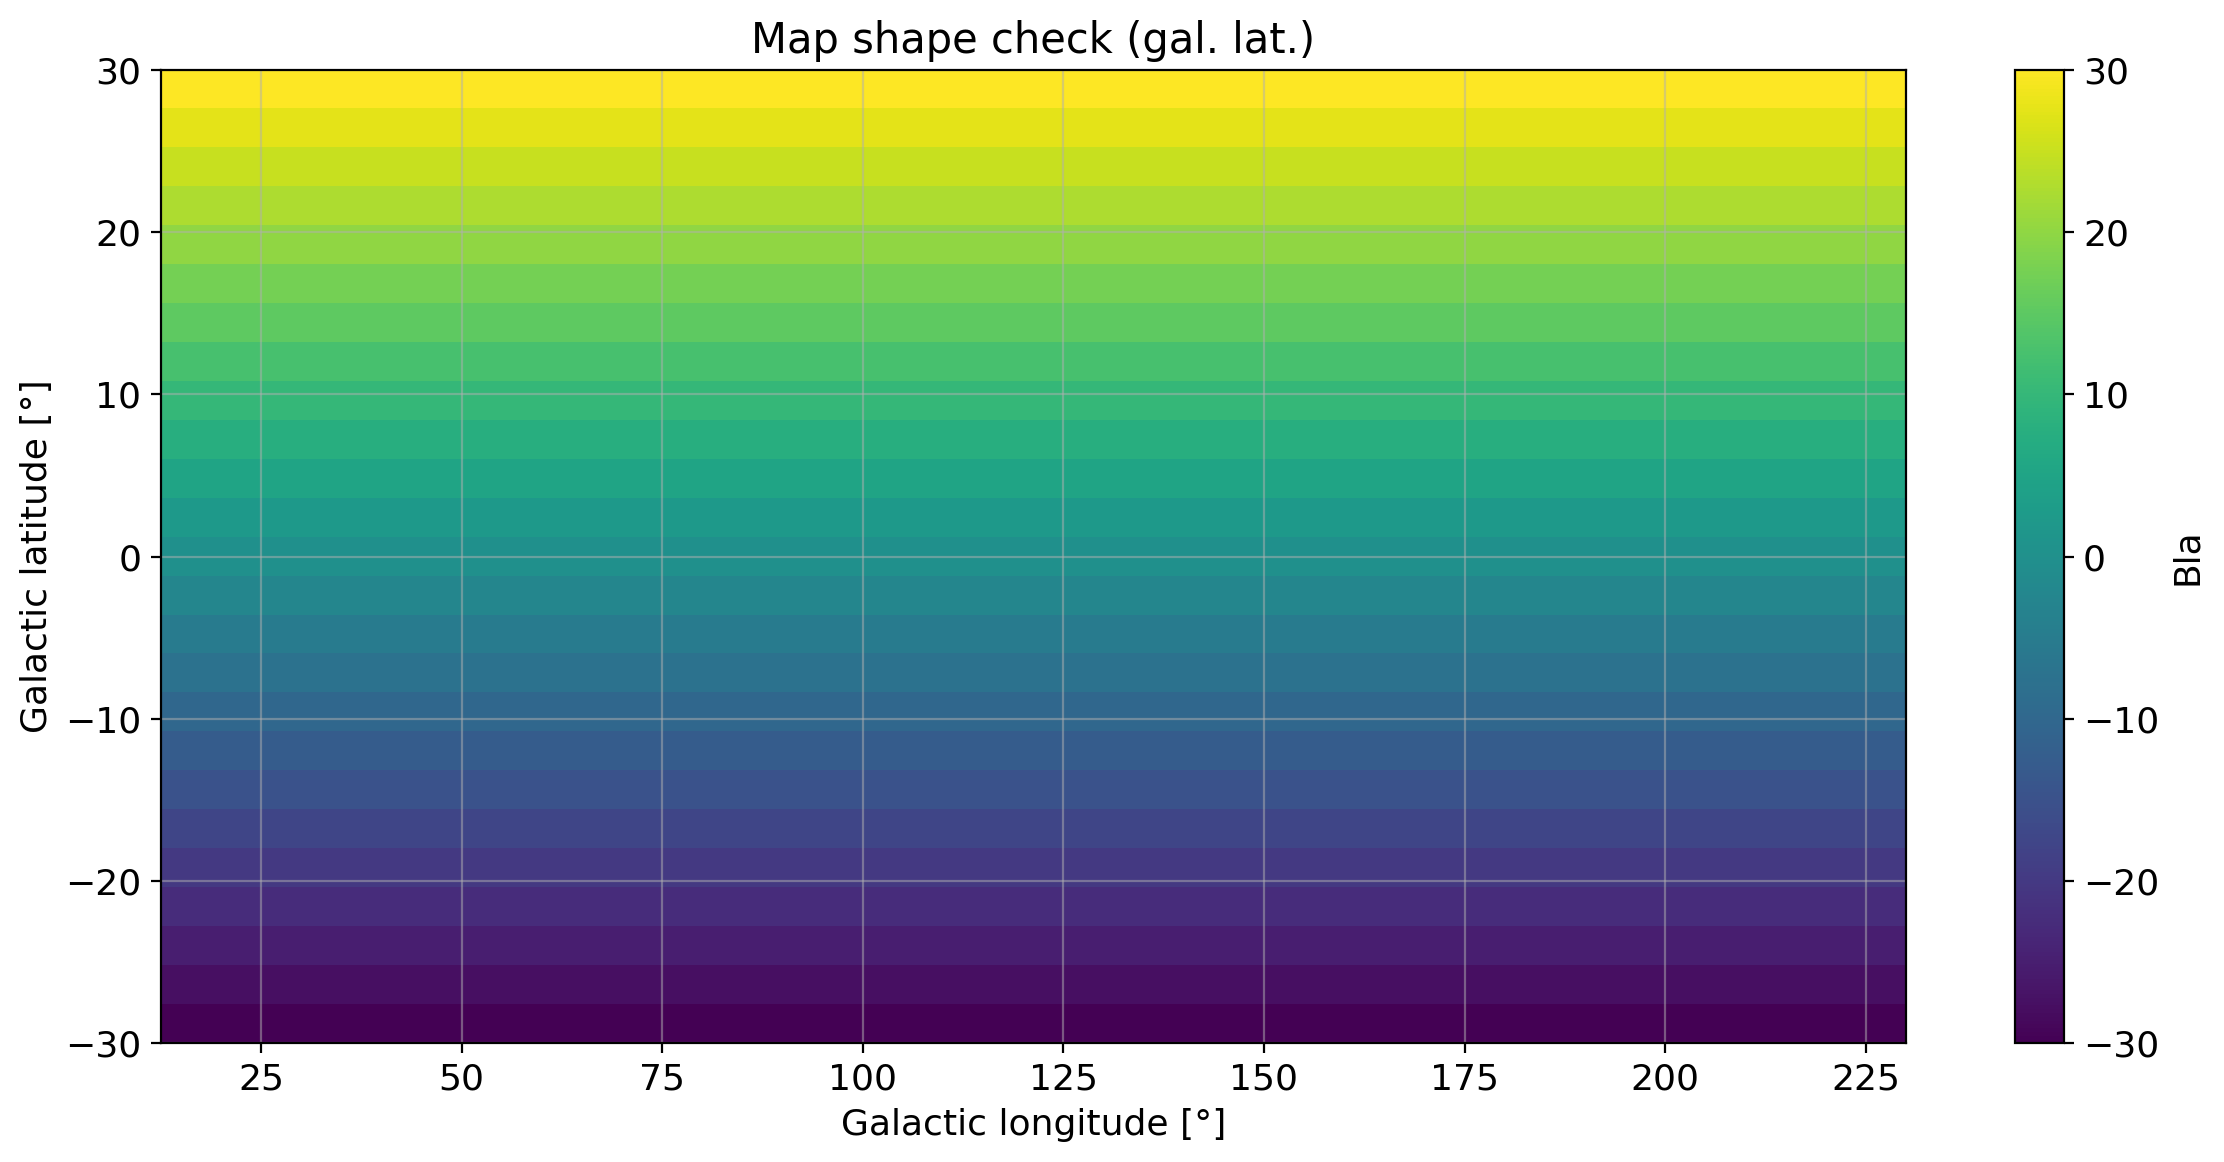

In [11]:
pt.plotting.set_up_plot(None, f'Galactic longitude [°]', 'Galactic latitude [°]')
plot_mw2d_pwr_map(mw2d_pwr_map, mw2d_g_long, mw2d_g_lat, "Power [a.u.]")
plt.show()
pt.plotting.set_up_plot("Map shape check (gal. long.)", f'Galactic longitude [°]', 'Galactic latitude [°]')
plot_mw2d_pwr_map(mw2d_long_map, mw2d_g_long, mw2d_g_lat, "Bla")
plt.show()
pt.plotting.set_up_plot("Map shape check (gal. lat.)", f'Galactic longitude [°]', 'Galactic latitude [°]')
plot_mw2d_pwr_map(mw2d_lat_map, mw2d_g_long, mw2d_g_lat, "Bla")
plt.show()